## Problem 2c

In [1]:
class NewtonsMethodResult:
    def __init__(self, result, steps, r_values):
        self.result = result
        self.steps = steps
        self.r_values = r_values
        
class NewtonsMethod:
    def __init__(self, fx, dfx):
        self._fx = fx
        self._dfx = dfx
        self._steps = []
        self._r_values = []
        
    def solve(self, initial_guess, tolerance=1e-8):
        iterations = 0
        x_previous = None
        x = initial_guess
        
        while abs(self._fx(x)) > tolerance:
            x = x - self._fx(x) / self._dfx(x)
            iterations += 1
            self._steps.append((iterations, x))
            
            if x_previous is not None:
                r_n = (x - x_previous) ** 2
                self._r_values.append((iterations, r_n))
                
            x_previous = x
            
        return NewtonsMethodResult(x, self._steps, self._r_values)
    
    def plot_r_n(self, filepath, format="eps"):
        import matplotlib.pyplot as plt
        
        iterations, r_values = zip(*self._r_values )
        plt.plot(iterations, r_values)
        plt.xlabel('Iteration')
        plt.ylabel('r_n')
        plt.savefig(filepath, format='eps')
        plt.show()
    

## Problem 2d

In [2]:
fx = lambda x: pow(x, 4) - 30
dfx = lambda x: 4 * pow(x, 3)
initial_guess = 81

newton = NewtonsMethod(fx, dfx)
result = newton.solve(initial_guess)
print(result.result)
print (f"Needed {len(result.steps)} iterations")
print(result.steps)

2.340347319320716
Needed 17 iterations
[(1, 60.75001411257317), (2, 45.562544036431866), (3, 34.171987320783586), (4, 25.629178444146696), (5, 19.222329342855616), (6, 14.41780295681876), (7, 10.815854659529375), (8, 8.11781859254386), (9, 6.102383790222225), (10, 4.609791548698299), (11, 3.5339063898665897), (12, 2.820369998132399), (13, 2.449582600736096), (14, 2.347439281811251), (15, 2.3403793934458386), (16, 2.340347319980058), (17, 2.340347319320716)]


## Problem 2e

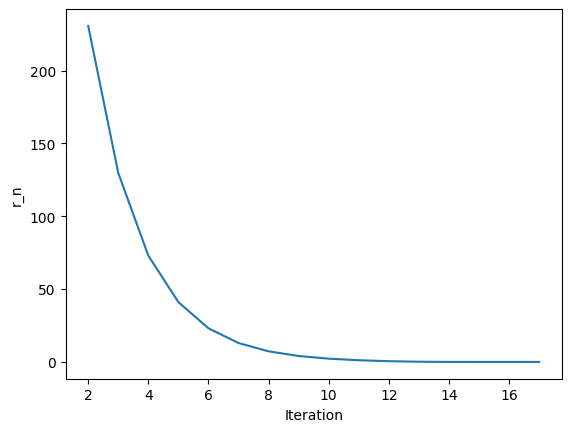

In [3]:
newton.plot_r_n("problem_2e.eps")

## Problem 2f

In [4]:
initial_guess = 200
tolerance = 1e-9

newton = NewtonsMethod(fx, dfx)
result = newton.solve(initial_guess, tolerance)
print(result.result)
print (f"Needed {len(result.steps)} iterations")
print(result.steps)

2.340347319320716
Needed 20 iterations
[(1, 150.0000009375), (2, 112.50000292534719), (3, 84.37500746149969), (4, 63.281268082023), (5, 47.46098065770293), (6, 35.59580564706758), (7, 26.697020524783582), (8, 20.023159553885368), (9, 15.018303916129861), (10, 11.265942044059306), (11, 8.454701692858219), (12, 6.353436115765014), (13, 4.794320984869401), (14, 3.663798857670656), (15, 2.900347932153706), (16, 2.482665974906067), (17, 2.3521239522861466), (18, 2.3404354694819176), (19, 2.3403473243007222), (20, 2.340347319320716)]


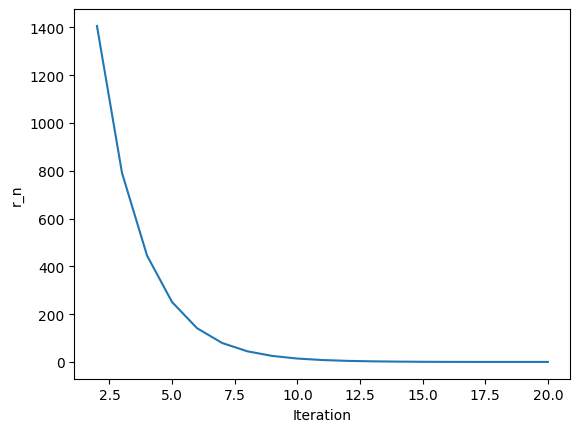

In [5]:
newton.plot_r_n("problem_2f.eps")
